> 提示：项目 Notebook 模板主要为了帮助同学了解如何划分报告结构，提示项目的注意事项。如果你理解项目的所有要求，那么完全可以自己创建新的 Notebook 来完成报告。

> 提交项目时，建议删除所有提示性文字，只保留你自己的 Markdown 说明文字和代码注释。

# 清理与分析数据（替换为你自己的报告标题）
## 收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import json
import re
import seaborn as sns
% matplotlib inline

> 提示：你需要收集的文件有：
1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。**如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。**
2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 查询 API 收集额外推特信息 `tweet_json.txt`，如果你无法访问 Twitter 的话，可以直接读取项目可供下载的 `tweet_json.txt` 文件，从中提取所需数据。至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列，**如果你的分析中不需要用到其他列，则不需要收集其他列**。如果提取了其他列只用于清洗，那么这样的清洗没有意义。

In [2]:
# 收集文件 1 保存为 dataframe
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 收集文件 2 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1],'wb') as f:
    f.write(r.content)
    
image_predict = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
# 收集文件 3 保存为 dataframe
twit_list = []
with open('tweet_json.txt') as f:
    for row in f:
        text = json.loads(row)
        t_id = text['id']
        re_count = text['retweet_count']
        favor_count = text['favorite_count']
        twit_list.append({'tweet_id':t_id,
                         'retweet_count':re_count,
                         'favorite_count':favor_count})
        
tweet = pd.DataFrame(twit_list, columns=['tweet_id','retweet_count','favorite_count'])


## 评估
### 目测评估

In [6]:
# 目测评估三个数据集
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 编程评估

In [7]:
# 你需要添加更多的 code cell 和 markdown cell 来完成所有目测评估
twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


twitter csv保留了html标签而且数据里包含大量的NaN

In [8]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

-in_reply_to_status_id 和 in_reply_to_user_id缺失之值太多，需要删除。

-retweeted_status相关列表缺失，严重影响分析准确率，需要删除。

-doggo,floofer,pupper,puppo等狗名称需要合并为一类。

-expanded_url有缺失项。

In [9]:
twitter.expanded_urls.duplicated().sum()

137

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [11]:
twitter.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [12]:
twitter.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Mutt         1
Bruno        1
Divine       1
Huck         1
Shikha       1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_test = twitter[['doggo','pupper','puppo','floofer']]
twitter_test.replace('None',np.nan).notnull().sum(axis=1).value_counts()

0    1976
1     366
2      14
dtype: int64

In [14]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
revolver                1
cougar                  1
school_bus              1
hand_blower             1
restaurant              1
Name: p1, Length: 378, dtype: int64

In [16]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predict.jpg_url.duplicated().sum()

66

In [17]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [23]:
tweet.duplicated().sum()

0

In [24]:
tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [18]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [19]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
tweet.favorite_count.value_counts()

0        177
1753       3
3548       3
689        3
1526       3
        ... 
10852      1
5878       1
14950      1
6760       1
15858      1
Name: favorite_count, Length: 2023, dtype: int64

> 提示：
- 完成目测评估和编程评估之后，总结列出你发现的三个数据集中的所有问题；
- 每个问题都要有对应的一句话或几句话描述；
- 最终至少要包含 8 个质量问题和 2 个整洁度问题。

#### 质量
##### `twitter表格
- 'expanded_urls'处在空值；
-’in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'存在大量空值。
- ‘timestamp'数据应该为时间
- ’expanded_urls'有137个重复
- 狗狗分类‘doggo','floofer','pupper','puppo'需要合并并删除重复数据

##### `image_predict表格
- ’tweet_id'是整数值
- ‘jpg_url’有66个重复值
- ‘p1','p2','p3'数据大小写不一致
- 


##### tweet表格
- 目前没有发现数据异常
- 
- 
- 


#### 整洁度
- twitter表格里的狗分类模式有问题
- 三个表格可以根据’tweet_id'合并
- 



## 清理


> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [26]:
# 备份三个数据集
df_1 = twitter.copy()
df_2 = image_predict.copy()
df_3 = tweet.copy()

#### 问题描述一

##### twitter, image_predict, tweet三个表格合并和删除不含图片的推特信息
使用merge()将三个表格合并为一个数组

##### 代码

In [27]:
# 解决问题一的代码
df = df_1.merge(df_3,how='left').merge(df_2,how='inner')

##### 测试

In [28]:
# 测试问题一是否正确清理完成
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
retweet_count                 2073 

合并后三个表格的数据都可以在新建的df表格里找到，方便后续清理

#### 问题描述二

##### 各项‘retweet'信息无效
str.find()在text列里找出’RT @‘信息

##### 代码

In [29]:
# 解决问题二的代码
df = df[df.text.str.find('RT @') == -1]

##### 测试

In [30]:
# 测试问题二是否正确清理完成
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

# 
将多余的无效数据删除

In [32]:
# drop()删除大量缺失项
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [33]:
# 删除retweeted列
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null 

In [35]:
# 删除无效列
df = df.drop(['expanded_urls','source'],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null o

删除doggo,floofer,pupper,puppo列

In [37]:
df = df.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 19 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), float64(5), int64(4), object(7)
memory usage: 270.7+ KB


In [39]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8842.0,39492.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,6480.0,33786.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4301.0,25445.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8925.0,42863.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,9721.0,41016.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [40]:
df.timestamp = pd.to_datetime(df.timestamp.str.split('+',expand=True)[0])

In [41]:
df.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### 存储清理后的主数据集

In [45]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df.to_csv('twitter_archive_master.csv',encoding='utf_8',index=False)

In [46]:
d = pd.read_csv('twitter_archive_master.csv')
d.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8842.0,39492.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,6480.0,33786.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4301.0,25445.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8925.0,42863.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,9721.0,41016.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10


## 分析和可视化

> 
favorite_count, retweet_count有什么关系

Text(0.5, 1.0, 'favorite_count and retweet_count correlation')

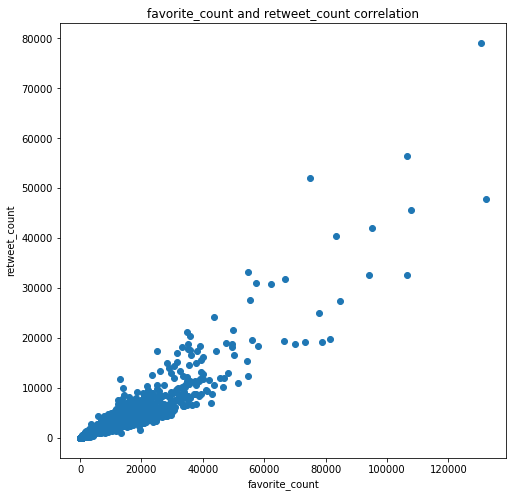

In [47]:
# 分析或可视化代码
plt.figure(figsize=(8,8))
plt.scatter(d['favorite_count'],d['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('favorite_count and retweet_count correlation')


与上面分析或可视化相关的见解或说明
favorite_count 和 retweet_count有正面相关性，favorite_count越高retweet_count随之也越高。

哪种品种的狗最受欢迎

In [52]:
# 分析或可视化代码
top = []
for index in d.index:
    if d.loc[index]['p1_dog']==True:
        top.append(d.loc[index]['p1'])
    elif d.loc[index]['p2_dog']==True:
        top.append(d.loc[index]['p2'])
    elif d.loc[index]['p3_dog']==True:
        top.append(d.loc[index]['p3'])
top = pd.Series(top)
top_10 = top.value_counts()[:10]
top_10

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Samoyed                42
Pomeranian             42
malamute               33
dtype: int64

Text(0.5, 1.0, 'top 10 favorite dog')

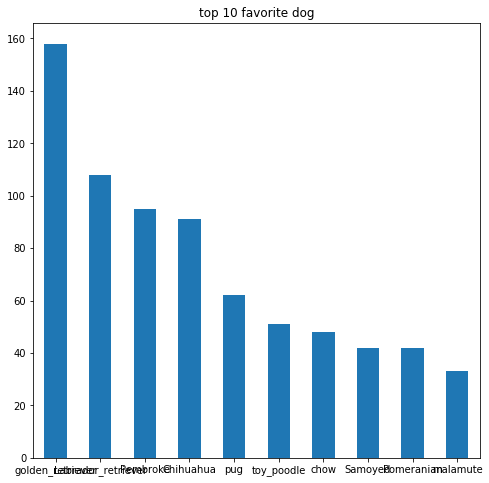

In [54]:
top_10.plot(kind='bar',figsize=(8,8),rot=0,)
plt.title('top 10 favorite dog')

最受欢迎的狗品种多为金毛犬等温顺犬种。

In [ ]:
# 你需要添加更多的 code cell 和 markdown cell 来完成所有分析和可视化


更多说明或总结等

> 提示：在完成 Notebook 的所有内容之后，还需要完成两篇文本和图片组成的 PDF 报告。因为这两篇报告中只是文字和图片，不需要包含代码，你可以使用文字编辑软件，比如 Word 来完成：
- 创建一个 300-600 字的书面报告，命名为 `wrangle_report.pdf`，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。
- 创建一个 250 字以上的书面报告，命名为 `act_report.pdf`，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。

> 提示：提交项目前建议删除 Notebook 中的所有提示性文字和注释，只保留自己的 Markdown 文本和代码注释。